In [34]:
from __future__ import print_function
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPool2D, Conv2DTranspose, UpSampling2D, Reshape, SimpleRNN,GRU, concatenate, LeakyReLU, BatchNormalization, Lambda
from tensorflow.keras.models import Sequential, Model
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
import time
import pygame


import vizdoom as vzd

from random import choice
from time import sleep

In [2]:
# results_AU movie is made with many frames
# Let's continue by skipping frames to have more diverse positions of the monster

In [3]:
output_path = 'video.avi'
vizdoom_path = "../../../../Mech Punk/Anaconda3/envs/vizdoom/lib/vizdoom/scenarios/"
fps = 10
image_counter=126742+1
memory_size = 32000
batch_size = 32
losses = []

In [4]:
# encoder_input_layer = Input([480, 640,3])

# encoder_layers = Conv2D(8, (3,3), activation="relu", padding="same")(encoder_input_layer)
# encoder_layers = MaxPool2D()(encoder_layers)

# encoder_layers = Conv2D(16, (3,3), activation="relu", padding="same")(encoder_layers)
# encoder_layers = MaxPool2D()(encoder_layers)

# encoder_layers = Conv2D(32, (3,3), activation="relu", padding="same")(encoder_layers)
# encoder_layers = MaxPool2D()(encoder_layers)

# encoder_layers = Conv2D(32, (3,3), activation="relu", padding="same")(encoder_layers)
# encoder_layers = MaxPool2D()(encoder_layers)

# encoder_layers = Flatten()(encoder_layers)

# encoder_layers = Dense(32)(encoder_layers)

# # decoder_input_layer = Input([32])

# decoder_layers = Dense(38400, input_shape=[32])(encoder_layers)

# decoder_layers = Reshape([30, 40, 32])(decoder_layers)

# decoder_layers = UpSampling2D()(decoder_layers)
# decoder_layers = Conv2DTranspose(32, (3,3), activation="relu", padding="same")(decoder_layers)

# decoder_layers = UpSampling2D()(decoder_layers)
# decoder_layers = Conv2DTranspose(32, (3,3), activation="relu", padding="same")(decoder_layers)

# decoder_layers = UpSampling2D()(decoder_layers)
# decoder_layers = Conv2DTranspose(16, (3,3), activation="relu", padding="same")(decoder_layers)

# decoder_layers = UpSampling2D()(decoder_layers)
# decoder_layers = Conv2DTranspose(8, (3,3), activation="relu", padding="same")(decoder_layers)

# decoder_layers = Conv2D(3, (3,3), activation="sigmoid", padding="same")(decoder_layers)

# # Models 
# autoencoder_model = Model(encoder_input_layer, decoder_layers)
# encoder_model = Model(encoder_input_layer, encoder_layers)
# decoder_model = Sequential(autoencoder_model.layers[11:])

# # Compile model
# autoencoder_model.compile(optimizer="adam", loss="mse")

In [5]:
# autoencoder_model.load_weights("./weights/temp_{}.h5".format(126742))

In [6]:
def sampling(args):
    """Reparameterization trick by sampling fr an isotropic unit Gaussian.

    # Arguments
        args (tensor): mean and log of variance of Q(z|X)

    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

encoder_input_layer = Input([480, 640,3])

encoder_layers = Conv2D(8, (3,3), activation="relu", padding="same")(encoder_input_layer)
encoder_layers = MaxPool2D()(encoder_layers)

encoder_layers = Conv2D(16, (3,3), activation="relu", padding="same")(encoder_layers)
encoder_layers = MaxPool2D()(encoder_layers)

encoder_layers = Conv2D(32, (3,3), activation="relu", padding="same")(encoder_layers)
encoder_layers = MaxPool2D()(encoder_layers)

encoder_layers = Conv2D(32, (3,3), activation="relu", padding="same")(encoder_layers)
encoder_layers = MaxPool2D()(encoder_layers)

encoder_layers = Flatten()(encoder_layers)

encoder_layers = Dense(32)(encoder_layers)


# Create the Variational encoder part
z_mean = Dense(16, name='z_mean')(encoder_layers)
z_log_var = Dense(16, name='z_log_var')(encoder_layers)
encoder_layers = Lambda(sampling, output_shape=(16,), name='z')([z_mean, z_log_var])

# variational_encoder_kl_part = Model(input_layer, [z_mean, z_log_var, z])


# decoder_input_layer = Input([32])

decoder_layers = Dense(38400, input_shape=[16])(encoder_layers)

decoder_layers = Reshape([30, 40, 32])(decoder_layers)

decoder_layers = UpSampling2D()(decoder_layers)
decoder_layers = Conv2DTranspose(32, (3,3), activation="relu", padding="same")(decoder_layers)

decoder_layers = UpSampling2D()(decoder_layers)
decoder_layers = Conv2DTranspose(32, (3,3), activation="relu", padding="same")(decoder_layers)

decoder_layers = UpSampling2D()(decoder_layers)
decoder_layers = Conv2DTranspose(16, (3,3), activation="relu", padding="same")(decoder_layers)

decoder_layers = UpSampling2D()(decoder_layers)
decoder_layers = Conv2DTranspose(8, (3,3), activation="relu", padding="same")(decoder_layers)

decoder_layers = Conv2D(3, (3,3), activation="sigmoid", padding="same")(decoder_layers)

# Models 
autoencoder_model = Model(encoder_input_layer, decoder_layers)
encoder_model = Model(encoder_input_layer, encoder_layers)
decoder_model = Sequential(autoencoder_model.layers[14:])

In [7]:
autoencoder_model.load_weights("./pretrained_weights/VAE_good_10_04_2020.h5")

In [14]:
decoder_model.save("VAE_decoder_good_10_04_2020",save_format="h5")

In [13]:
decoder_model.save()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 38400)             652800    
_________________________________________________________________
reshape (Reshape)            (None, 30, 40, 32)        0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 60, 80, 32)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 80, 32)        9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 160, 32)      9248      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 240, 320, 32)      0

In [11]:
# autoencoder_model.save("VAE_good_10_04_2020")

INFO:tensorflow:Assets written to: VAE_good_10_04_2020\assets


In [27]:
def get_sample(encoded_frames_history, actions_history, steps_history, l=10):
    steps = [1]
    while 1 in steps:
        index = np.random.randint(len(encoded_frames_history)-(l+1))
        steps = steps_history[index:index+(l+1)]
    encoded_frames = encoded_frames_history[index:index+(l+1)]
    actions = actions_history[index:index+l]
    return [(np.array(encoded_frames[:-1]),np.array(actions)),encoded_frames[-1]]

def get_samples(encoded_frames_history, actions_history, steps_history, l=10, batch_size=32):
    encoded_frame_samples = []
    action_samples = []
    prediction_samples = []
    for i in range(batch_size):
        sample = get_sample(encoded_frames_history, actions_history, steps_history, l)
        encoded_frame_samples.append(sample[0][0])
        action_samples.append(sample[0][1])
        prediction_samples.append(sample[1])
    return (np.array(encoded_frame_samples), np.array(action_samples)), np.array(prediction_samples)

In [10]:
# sample = get_sample(encoded_frames_history, actions_history, steps_history, l=10)

In [11]:
# samples = get_samples(encoded_frames_history, actions_history, steps_history, l=10, batch_size=32)

In [12]:
# sample[0][0].shape

In [13]:
# sample[0][1].shape

In [14]:
# sample[1].shape

In [38]:
number_of_frames = 6

number_of_parameters = 16

frame_input = Input((number_of_frames, number_of_parameters))
action_input = Input((number_of_frames,3))

inputs = concatenate([frame_input, action_input],axis=2)

# inputs = Input((number_of_frames, number_of_parameters + 3))

# reset_after=True must be added due to a bug:
# https://github.com/tensorflow/tfjs/issues/2442
# However! stil no success
# layers = GRU(32, reset_after=True)(inputs)

layers = SimpleRNN(32)(inputs)

layers = Dense(32)(layers)
layers = LeakyReLU()(layers)
layers = BatchNormalization()(layers)

layers = Dense(32)(layers)
layers = LeakyReLU()(layers)
# layers = BatchNormalization()(layers)
layers = Dense(number_of_parameters)(layers)

extrapolation_model = Model((frame_input, action_input), layers)
# extrapolation_model = Model(inputs, layers)

extrapolation_model.compile(loss="mse", optimizer="adam")

In [51]:
# extrapolation_model.save("pretrained_models/extrapolation_simple_.h5")


In [119]:
# prediction = extrapolation_model.predict((sample[0][0].reshape(1,10,32), sample[0][1].reshape(1,10,3)))[0]
# predictions = extrapolation_model.predict(samples[0])
# test_loss = extrapolation_model.evaluate(samples[0], samples[1],verbose=False)
# train_loss = extrapolation_model.train_on_batch(samples[0], samples[1])

In [120]:
# train_loss

In [39]:

encoded_frames_history = []
actions_history = []
steps_history = []

train_losses = []
test_losses = []

action = 0

In [47]:
if __name__ == "__main__":
    # Create DoomGame instance. It will run the game and communicate with you.
    game = vzd.DoomGame()

    # Now it's time for configuration!
    # load_config could be used to load configuration instead of doing it here with code.
    # If load_config is used in-code configuration will also work - most recent changes will add to previous ones.
    # game.load_config("../../scenarios/basic.cfg")

    # Sets path to additional resources wad file which is basically your scenario wad.
    # If not specified default maps will be used and it's pretty much useless... unless you want to play good old Doom.
    game.set_doom_scenario_path(vizdoom_path + "basic.wad")
    # Sets map to start (scenario .wad files can contain many maps).
    game.set_doom_map("map01")

    # Sets resolution. Default is 320X240
    game.set_screen_resolution(vzd.ScreenResolution.RES_640X480)

    # Sets the screen buffer format. Not used here but now you can change it. Default is CRCGCB.
    game.set_screen_format(vzd.ScreenFormat.RGB24)

    # Enables depth buffer.
    game.set_depth_buffer_enabled(True)

    # Enables labeling of in game objects labeling.
    game.set_labels_buffer_enabled(True)

    # Enables buffer with top down map of the current episode/level.
    game.set_automap_buffer_enabled(True)

    # Enables information about all objects present in the current episode/level.
    game.set_objects_info_enabled(True)

    # Enables information about all sectors (map layout).
    game.set_sectors_info_enabled(True)

    # Sets other rendering options (all of these options except crosshair are enabled (set to True) by default)
    game.set_render_hud(False)
    game.set_render_minimal_hud(False)  # If hud is enabled
    game.set_render_crosshair(False)
    game.set_render_weapon(True)
    game.set_render_decals(False)  # Bullet holes and blood on the walls
    game.set_render_particles(False)
    game.set_render_effects_sprites(False)  # Smoke and blood
    game.set_render_messages(False)  # In-game messages
    game.set_render_corpses(False)
    game.set_render_screen_flashes(True)  # Effect upon taking damage or picking up items

    # Adds buttons that will be allowed.
    game.add_available_button(vzd.Button.MOVE_LEFT)
    game.add_available_button(vzd.Button.MOVE_RIGHT)
    game.add_available_button(vzd.Button.ATTACK)

    # Adds game variables that will be included in state.
    game.add_available_game_variable(vzd.GameVariable.AMMO2)

    # Causes episodes to finish after 200 tics (actions)
    game.set_episode_timeout(200)

    # Makes episodes start after 10 tics (~after raising the weapon)
    game.set_episode_start_time(10)

    # Makes the window appear (turned on by default)
    game.set_window_visible(False)

    # Turns on the sound. (turned off by default)
    game.set_sound_enabled(False)

    # Sets the livin reward (for each move) to -1
    game.set_living_reward(-1)

    # Sets ViZDoom mode (PLAYER, ASYNC_PLAYER, SPECTATOR, ASYNC_SPECTATOR, PLAYER mode is default)
    game.set_mode(vzd.Mode.PLAYER)

    # Enables engine output to console.
    #game.set_console_enabled(True)

    # Initialize the game. Further configuration won't take any effect from now on.
    game.init()

    # Define some actions. Each list entry corresponds to declared buttons:
    # MOVE_LEFT, MOVE_RIGHT, ATTACK
    # game.get_available_buttons_size() can be used to check the number of available buttons.
    # 5 more combinations are naturally possible but only 3 are included for transparency when watching.
    actions = [[True, False, False], [False, True, False], [False, False, True]]

    # Run this many episodes
    episodes = 10000

    # Sets time that will pause the engine after each action (in seconds)
    # Without this everything would go too fast for you to keep track of what's happening.
    sleep_time = 1.0 / vzd.DEFAULT_TICRATE  # = 0.028
    
    frame_counter = 0
    counter = 0

    for i in range(episodes):
        print("Episode #{}:   ".format(i + 1))
#         if i % 1000 == 0:
#             autoencoder_model.save_weights("./weights/temp_{}.h5".format(image_counter))

        # Starts a new episode. It is not needed right after init() but it doesn't cost much. At least the loop is nicer.
        game.new_episode()

        action_counter = 0
        step = 0
        while not game.is_episode_finished():
            
            step+=1
            
            action_counter-=1
            frame_counter+=1
            
            
            
            # Gets the state
            state = game.get_state()

            # Which consists of:
            n = state.number
            vars = state.game_variables
            screen_buf = state.screen_buffer
            depth_buf = state.depth_buffer
            labels_buf = state.labels_buffer
            automap_buf = state.automap_buffer
            labels = state.labels
            objects = state.objects
            sectors = state.sectors
            
            
            assert len(encoded_frames_history) == len(actions_history)
            assert len(actions_history) == len(steps_history)
            
            frame = screen_buf/255
            encoded_frame = encoder_model.predict(np.expand_dims(frame,0))[0]
            encoded_frames_history.append(encoded_frame)
            actions_history.append(action)
            steps_history.append(step)
            
            if len(encoded_frames_history) > min(memory_size, 100 * batch_size):
                samples = get_samples(encoded_frames_history, actions_history, steps_history, l=number_of_frames, batch_size=128)
                
                test_loss = extrapolation_model.evaluate(samples[0], samples[1],verbose=False)
                train_loss = extrapolation_model.train_on_batch(samples[0], samples[1])
                train_losses.append(train_loss)
                test_losses.append(test_loss)
                
                print(np.mean(test_losses[-10:]),end="\r")
                
            
            while len(encoded_frames_history) > memory_size:
                encoded_frames_history.pop(0)
                actions_history.pop(0)
                steps_history.pop(0)

            if action_counter < 0:
                action = choice(actions)
                action_counter = np.random.randint(4,18)
            r = game.make_action(action)
            

        print("\n")

    # It will be done automatically anyway but sometimes you need to do it in the middle of the program...
    game.close()
#     extrapolation_model.save_weights("extrapolation_2_model_weights.h5")

Episode #1:   
0.6767985656857497

Episode #2:   
0.6749998569488526

Episode #3:   
0.6709678664803504

Episode #4:   
0.6761023789644242

Episode #5:   
0.6646459817886352

Episode #6:   
0.6731902584433556

Episode #7:   
0.6676229491829873

Episode #8:   
0.6551325052976609

Episode #9:   
0.6641586616635322

Episode #10:   
0.6571631908416748

Episode #11:   
0.6527461692690849

Episode #12:   
0.6774027764797215

Episode #13:   
0.6597178399562835

Episode #14:   
0.6661540448665619

Episode #15:   
0.6571366876363754

Episode #16:   
0.6632355734705925

Episode #17:   
0.6633279845118523

Episode #18:   
0.6716410025954247

Episode #19:   
0.6665563285350847

Episode #20:   
0.6593293577432633

Episode #21:   
0.6498646125197413

Episode #22:   
0.6577954977750778

Episode #23:   
0.6690633982419968

Episode #24:   
0.6706193536520004

Episode #25:   
0.6549000963568687

Episode #26:   
0.6656528264284134

Episode #27:   
0.6635615944862365

Episode #28:   
0.6446551620960236

E

KeyboardInterrupt: 

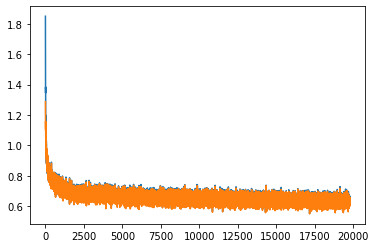

In [48]:

%matplotlib inline
plt.plot(train_losses)
plt.plot(test_losses)

In [23]:
# extrapolation_model.save_weights("pretrained_weights/extrapolation_VAE_good_model_weights_.h5")
# extrapolation_model.load_weights("pretrained_weights/extrapolation_VAE_good_model_weights.h5")

# extrapolation_model.save_weights("pretrained_weights/extrapolation_AE_aweful_model_weights_.h5")
# extrapolation_model.load_weights("pretrained_weights/extrapolation_AE_aweful_model_weights.h5")

In [17]:
# extrapolation_model.save("extrapolation_VAE_good_model_weights",save_format="h5")

In [34]:
len(encoded_frames_history)

539

In [49]:
min_encoding_values = np.min(encoded_frames_history,axis=0)
max_encoding_values = np.max(encoded_frames_history,axis=0)
mean_encoding_values = np.mean(encoded_frames_history,axis=0)
std_encoding_values = np.std(encoded_frames_history,axis=0)

In [50]:
sample = get_samples(encoded_frames_history, actions_history, steps_history, l=number_of_frames, batch_size=1)
frames = sample[0][0].copy()
actions = sample[0][1].copy()

action_index = 0

pygame.init()
screen = pygame.display.set_mode([640, 480])
action_index = 0
while True:
    events = pygame.event.get()
    for event in events:
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT:
                print("left")
                action_index = 1
            if event.key == pygame.K_RIGHT:
                print("right")
                action_index = 0
            if event.key == pygame.K_UP:
                print("shoot")
                action_index = 2
            action = [False, False, False]
            action[action_index]=True
    

    next_encoded_frame = extrapolation_model.predict((frames, actions))
#     next_encoded_frame = np.clip(next_encoded_frame, mean_encoding_values-2*std_encoding_values, mean_encoding_values+2*std_encoding_values)
    
    frames[0] = np.concatenate((frames[0,1:],next_encoded_frame))
    actions[0] = np.concatenate((actions[0,1:],np.array([action])))
    
    gridarray = np.array(255*decoder_model.predict(next_encoded_frame)[0],dtype="int")
    surface = pygame.surfarray.make_surface(gridarray)
    surface = pygame.transform.scale(surface, (200, 200))  # Scaled a bit.
    surface = pygame.transform.rotozoom(surface, -90, 1)
    
    screen.blit(surface, (0, 0))
    pygame.display.update()
    
    time.sleep(0.1)
    

right
left
shoot
shoot
shoot
left
left
left
left
right


KeyboardInterrupt: 

In [39]:
pygame.quit()

In [63]:
decoder_model.predict(next_encoded_frame)[0].shape

(480, 640, 3)